In [2]:
#Import Packages
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
np.random.seed(0)

In [31]:
#Get Mean Square Error
def get_mse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)
#Split data into test and train dataset
def train_test_split(ratings):
    test = np.zeros(ratings.shape)
    train = ratings.copy()
    for user in range(ratings.shape[0]):
        test_ratings = np.random.choice(ratings[user, :].nonzero()[0],size=10,replace=False)
        train[user, test_ratings] = 0.
        test[user, test_ratings] = ratings[user, test_ratings]
    assert(np.all((train * test) == 0)) 
    return train, test
#K-Fold Cross Validation
def kFold_Cross_Validation(Train, model, modelParameters, nFolds):    
    ind = np.array(range(0, len(Train)))
    folds = np.array_split(ind, nFolds)    
    minlosslist = []
    for i in range(0, len(folds)):
        validationSet = folds[i]
        trainSet = np.setdiff1d(ind, validationSet)        
        train_data = np.take(xTrain, trainSet, axis = 0)
        test_data = np.take(xTrain, validationSet, axis = 0)
        MF_SGD = model(**modelParameters)
        minlosslist.append(testLoss[-1])        
    return modelParams,minlosslist

In [25]:
cols = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('ml-100k/u.data', sep='\t', names=cols)
n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
ratings = np.zeros((n_users, n_items))
for row in df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]
#Splitting data into test and train
train, test = train_test_split(ratings)

### Analysis of Movielens 100k dataset

In [158]:
df.head()

,user_id,item_id,rating,timestamp,year,month
214,259,255,4,1997-09-20 05:05:10,1997,9
83965,259,286,4,1997-09-20 05:05:27,1997,9
43027,259,298,4,1997-09-20 05:05:54,1997,9
21396,259,185,4,1997-09-20 05:06:21,1997,9
82655,259,173,4,1997-09-20 05:07:23,1997,9


In [159]:
df.tail()

,user_id,item_id,rating,timestamp,year,month
46773,729,689,4,1998-04-23 01:10:38,1998,4
73008,729,313,3,1998-04-23 01:10:38,1998,4
46574,729,328,3,1998-04-23 01:10:38,1998,4
64312,729,748,4,1998-04-23 01:10:38,1998,4
79208,729,272,4,1998-04-23 01:10:38,1998,4


In [169]:
df.describe()

,user_id,item_id,rating,year,month
count,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000
mean,462.48475,425.530130,3.529860,1997.47116,6.823180
std,266.61442,330.798356,1.125674,0.49917,4.316246
min,1.00000,1.000000,1.000000,1997.00000,1.000000
25%,254.00000,175.000000,3.000000,1997.00000,2.000000
50%,447.00000,322.000000,4.000000,1997.00000,9.000000
75%,682.00000,631.000000,4.000000,1998.00000,11.000000
max,943.00000,1682.000000,5.000000,1998.00000,12.000000


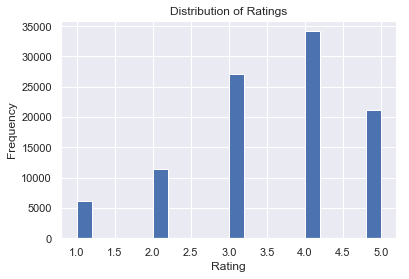

In [168]:
#Distribution of Ratings in terms of frequency
df.rating.plot.hist(bins=20)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

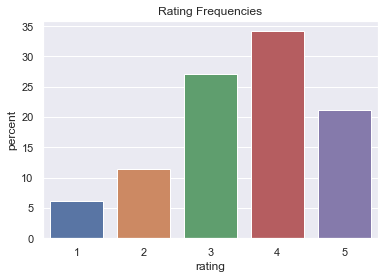

In [160]:
#Distribution of Ratings in terms of percentage
norm_counts = (df['rating'].value_counts(normalize=True, sort=False).multiply(100).reset_index()
    .rename(columns={'rating': 'percent', 'index': 'rating'}))
ax = sns.barplot(x='rating', y='percent', data=norm_counts)
ax.set_title('Rating Frequencies')
plt.show()

In [209]:
#Distribution of average Ratings over time
month_counts = df.groupby(['year', 'month'])['rating'].agg([np.mean, np.std])
month_counts = month_counts.rename(index=str, columns={'mean': 'Rating'})
month_counts = month_counts.reset_index()
month_counts['Date'] = month_counts[['year', 'month']].apply(lambda x: datetime(year=int(x[0]), month=int(x[1]), day=1), axis=1)
month_counts = month_counts.set_index('Date', drop=True)
display(month_counts)

,year,month,Rating,std
Date,,,,
1997-09-01,1997,9,3.536429,1.093831
1997-10-01,1997,10,3.592110,1.099493
1997-11-01,1997,11,3.559903,1.108878
1997-12-01,1997,12,3.580908,1.109153
1998-01-01,1998,1,3.399233,1.188848
1998-02-01,1998,2,3.453308,1.128869
1998-03-01,1998,3,3.538558,1.110929
1998-04-01,1998,4,3.585308,1.136498


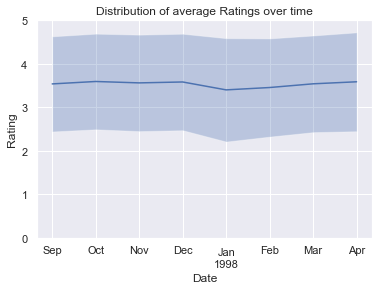

In [213]:
month_counts['Rating'].plot(style='b-')
plt.fill_between(month_counts.index,month_counts['Rating'] - month_counts['std'],month_counts['Rating'] + month_counts['std'],alpha=0.3)
plt.ylim([0, 5])
plt.ylabel('Rating')
plt.gca().grid(which='minor')
plt.title('Distribution of average Ratings over time')
plt.show()

In [214]:
##Count of No_of_Movies and No_of_Users over time
df['Date'] = df[['year', 'month']].apply(lambda x: datetime(year=int(x[0]), month=int(x[1]), day=1), axis=1)
display(df.head())

,user_id,item_id,rating,timestamp,year,month,Date
214,259,255,4,1997-09-20 05:05:10,1997,9,1997-09-01
83965,259,286,4,1997-09-20 05:05:27,1997,9,1997-09-01
43027,259,298,4,1997-09-20 05:05:54,1997,9,1997-09-01
21396,259,185,4,1997-09-20 05:06:21,1997,9,1997-09-01
82655,259,173,4,1997-09-20 05:07:23,1997,9,1997-09-01


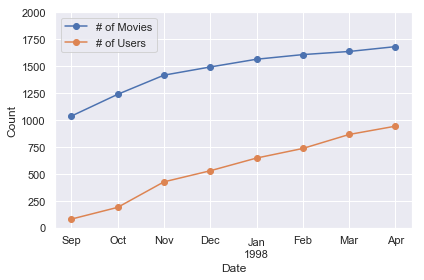

In [215]:
n_users = []
n_movies = []
dates = np.unique(df['Date'])
for date in dates:
    n_users.append(df[df['Date'] <= date]['user_id'].nunique())
    n_movies.append(df[df['Date'] <= date]['item_id'].nunique())
df_users = pd.DataFrame({'Date': dates, '# of Users': n_users}).set_index('Date')
df_movies = pd.DataFrame({'Date': dates, '# of Movies': n_movies}).set_index('Date')
fig, ax = plt.subplots()
df_movies['# of Movies'].plot(style='o-', ax=ax)
df_users['# of Users'].plot(style='o-', ax=ax)
plt.ylabel('Count')
plt.ylim([0, 2000])
ax.grid(which='minor')
plt.tight_layout()
plt.legend()
plt.show()

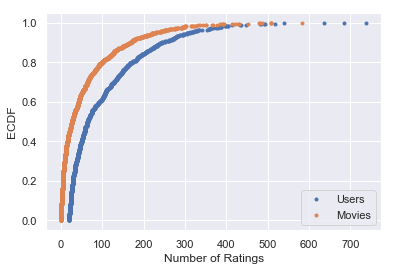

In [166]:
#Empirical Cumulative Distribution Function (ECDF) plot.
user_counts = df['user_id'].value_counts(ascending=True)
user_counts.index = np.arange(len(user_counts)) / len(user_counts)
plt.plot(user_counts, user_counts.index, '.', label='Users')
movie_counts = df['item_id'].value_counts(ascending=True)
movie_counts.index = np.arange(len(movie_counts)) / len(movie_counts)
plt.plot(movie_counts, movie_counts.index, '.', label='Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('ECDF')
plt.legend()
plt.show()

### Analysis of Red Wine dataset

In [170]:
wineData = pd.read_csv("winequality-red.csv", sep=";")

In [172]:
wineData.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [181]:
print("Shape of Red Wine dataset: {s}".format(s=wineData.shape))
print("Column headers/names: {s}".format(s = list(wineData)))

Shape of Red Wine dataset: (1599, 12)
Column headers/names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [182]:
wineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [183]:
wineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [184]:
wineData.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [185]:
wineData['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [187]:
wineData.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

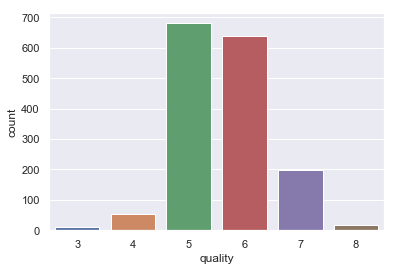

In [188]:
#Quality Countplot 
sns.countplot(x='quality', data=wineData)

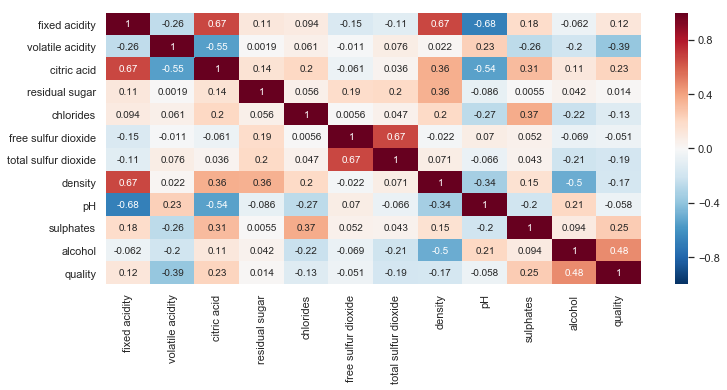

In [189]:
#HeatMap plot for correlation
correlation = wineData.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [190]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

It can be observed that, the 'alcohol, sulphates, citric_acid & fixed_acidity' have maximum corelation with response variable 'quality'.

This means that, they need to be further analysed for detailed pattern and corelation exploration. Hence, only these 4 variables are analysed in detail.

[Text(0,0.5,'Alcohol Percent'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Alcohol percent in different wine quality types')]

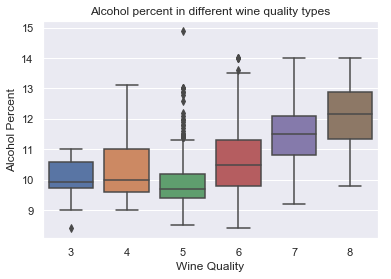

In [192]:
bx = sns.boxplot(x="quality", y='alcohol', data = wineData)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')

In [194]:
conditions = [(wineData['quality'] >= 7),(wineData['quality'] <= 4)]
rating = ['good', 'bad']
wineData['rating'] = np.select(conditions, rating, default='average')
wineData.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

[Text(0,0.5,'Sulphates'),
 Text(0.5,0,'Wine Ratings'),
 Text(0.5,1,'Sulphates in different types of Wine ratings')]

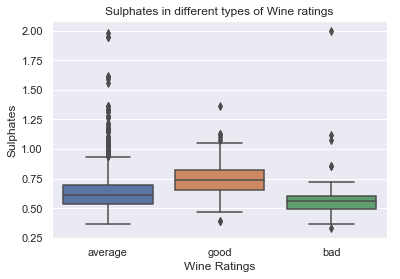

In [195]:
bx = sns.boxplot(x="rating", y='sulphates', data = wineData)
bx.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates in different types of Wine ratings')

[Text(0,0.5,'Citric Acid'),
 Text(0.5,0,'Wine Ratings'),
 Text(0.5,1,'Citric_acid in different types of Wine ratings')]

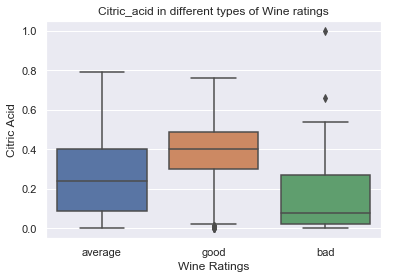

In [199]:
bx = sns.boxplot(x="rating", y='citric acid', data = wineData)
bx.set(xlabel='Wine Ratings', ylabel='Citric Acid', title='Citric_acid in different types of Wine ratings')

[Text(0,0.5,'Fixed Acidity'),
 Text(0.5,0,'Wine Ratings'),
 Text(0.5,1,'Fixed Acidity in different types of Wine ratings')]

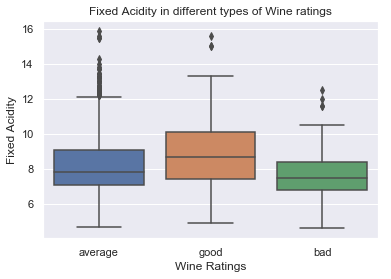

In [198]:
bx = sns.boxplot(x="rating", y='fixed acidity', data = wineData)
bx.set(xlabel='Wine Ratings', ylabel='Fixed Acidity', title='Fixed Acidity in different types of Wine ratings')

[Text(0,0.5,'pH'),
 Text(0.5,0,'Wine Ratings'),
 Text(0.5,1,'pH in different types of Wine ratings')]

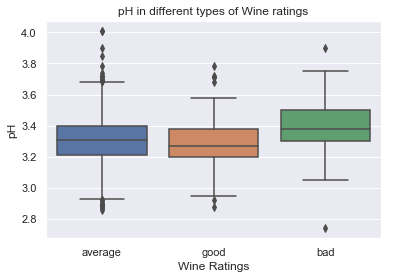

In [202]:
bx = sns.boxplot(x="rating", y="pH", data = wineData);
bx.set(xlabel='Wine Ratings', ylabel='pH', title='pH in different types of Wine ratings')

In [43]:
class mf():
    def __init__(self,R,K=40,item_fact_reg=0.0,user_fact_reg=0.0,item_bias_reg=0.0,user_bias_reg=0.0,verbose=False):             
        self.R = R
        self.n_users, self.n_items = R.shape
        self.K = K
        self.item_fact_reg = item_fact_reg
        self.user_fact_reg = user_fact_reg
        self.item_bias_reg = item_bias_reg
        self.user_bias_reg = user_bias_reg
        self.sample_row, self.sample_col = self.R.nonzero()
        self.n_samples = len(self.sample_row)
        self._v = verbose  
    def sgd(self):
        for idx in self.training_indices:
            u = self.sample_row[idx]
            i = self.sample_col[idx]
            prediction = self.predict(u, i)
            e = (self.R[u,i] - prediction)            
            self.user_bias[u] += self.learning_rate * (e - self.user_bias_reg * self.user_bias[u])
            self.item_bias[i] += self.learning_rate * (e - self.item_bias_reg * self.item_bias[i])            
            self.user_vecs[u, :] += self.learning_rate * (e * self.item_vecs[i, :] - self.user_fact_reg * self.user_vecs[u,:])
            self.item_vecs[i, :] += self.learning_rate * (e * self.user_vecs[u, :] - self.item_fact_reg * self.item_vecs[i,:])
    def train(self, n_iter=10, learning_rate=0.1):
        self.user_vecs = np.random.normal(scale=1./self.K,size=(self.n_users, self.K))
        self.item_vecs = np.random.normal(scale=1./self.K,size=(self.n_items, self.K))        
        self.learning_rate = learning_rate
        self.user_bias = np.zeros(self.n_users)
        self.item_bias = np.zeros(self.n_items)
        self.global_bias = np.mean(self.R[np.where(self.R != 0)])
        self.partial_train(n_iter)
    def predict(self, u, i):
        prediction = self.global_bias + self.user_bias[u] + self.item_bias[i]
        prediction += self.user_vecs[u, :].dot(self.item_vecs[i, :].T)
        return prediction   
    def partial_train(self, n_iter):
        ctr = 1
        while ctr <= n_iter:
            if ctr % 10 == 0 and self._v:
                print('\tcurrent iteration: {}'.format(ctr))
            self.training_indices = np.arange(self.n_samples)
            np.random.shuffle(self.training_indices)
            self.sgd()
            ctr += 1   
    def model_fit(self, iter_array, test, learning_rate=0.1):
        iter_array.sort()
        self.train_mse =[]
        self.test_mse = []
        iter_diff = 0
        for (i, n_iter) in enumerate(iter_array):
            if self._v:
                print('Iteration: {}'.format(n_iter))
            if i == 0:
                self.train(n_iter - iter_diff, learning_rate)
            else:
                self.partial_train(n_iter - iter_diff)
            predictions = self.predict_all()
            self.train_mse += [get_mse(predictions, self.R)]
            self.test_mse += [get_mse(predictions, test)]
            if self._v:
                print('Train mse: ' + str(self.train_mse[-1]))
                print('Test mse: ' + str(self.test_mse[-1]))
            iter_diff = n_iter
    def predict_all(self):
        predictions = np.zeros((self.user_vecs.shape[0],self.item_vecs.shape[0]))
        for u in range(self.user_vecs.shape[0]):
            for i in range(self.item_vecs.shape[0]):
                predictions[u, i] = self.predict(u, i)                
        return predictions   

In [63]:
#Matrix Factorization with 3-Fold Cross Validation & Hyperparamater Tuning for MovieLens 100k dataset
ind = np.array(range(0, len(train)))
folds = np.array_split(ind, 3)    
mselist = []
fold_mse = []
iter_array = [10]
k = [5, 20, 40]
lamda = [0.001, 0.000001, 0.01]
alpha = [0.00001, 0.0001, 0.001]
lamda.sort()
alpha.sort()
best_params = {}
best_params['k'] = k[0]
best_params['reg'] = lamda[0]
best_params['rate'] = alpha[0]
best_params['train_mse'] = np.inf
best_params['test_mse'] = np.inf
best_params['model'] = None
for fact in k:    
    for reg in lamda:        
        for rate in alpha:
            print('\nK: {}'.format(fact))
            print('Lamda: {}'.format(reg))
            print('Alpha: {}'.format(rate))
            ##3-Fold Cross Validation
            for i in range(0, len(folds)):
                print('Fold: {}'.format(i))
                validationSet = folds[i]
                trainSet = np.setdiff1d(ind, validationSet)        
                train_data = np.take(train, trainSet, axis = 0)
                test_data = np.take(test, validationSet, axis = 0)
                MF_SGD = mf(train_data, k=fact,user_fact_reg=reg, item_fact_reg=reg,
                                user_bias_reg=reg, item_bias_reg=reg,verbose=False)
                MF_SGD.model_fit(iter_array, test_data, alpha=rate)
                mselist.append(MF_SGD.test_mse)  
            fold_mse.append(np.average(mselist))
            if fold_mse[-1] < best_params['test_mse']:
                best_params['k'] = fact
                best_params['reg'] = reg
                best_params['train_mse'] = MF_SGD.train_mse
                best_params['test_mse'] = MF_SGD.test_mse
                best_params['model'] = MF_SGD
print('New optimal hyperparameters')
print(pd.Series(best_params))


K: 5
Lamda: 1e-06
Alpha: 1e-05
Fold: 0
Fold: 1
Fold: 2

K: 5
Lamda: 1e-06
Alpha: 0.0001
Fold: 0
Fold: 1
Fold: 2

K: 5
Lamda: 1e-06
Alpha: 0.001
Fold: 0
Fold: 1
Fold: 2

K: 5
Lamda: 0.001
Alpha: 1e-05
Fold: 0
Fold: 1
Fold: 2

K: 5
Lamda: 0.001
Alpha: 0.0001
Fold: 0
Fold: 1
Fold: 2

K: 5
Lamda: 0.001
Alpha: 0.001
Fold: 0
Fold: 1
Fold: 2

K: 5
Lamda: 0.01
Alpha: 1e-05
Fold: 0
Fold: 1
Fold: 2

K: 5
Lamda: 0.01
Alpha: 0.0001
Fold: 0
Fold: 1
Fold: 2

K: 5
Lamda: 0.01
Alpha: 0.001
Fold: 0
Fold: 1
Fold: 2

K: 20
Lamda: 1e-06
Alpha: 1e-05
Fold: 0
Fold: 1
Fold: 2

K: 20
Lamda: 1e-06
Alpha: 0.0001
Fold: 0
Fold: 1
Fold: 2

K: 20
Lamda: 1e-06
Alpha: 0.001
Fold: 0
Fold: 1
Fold: 2

K: 20
Lamda: 0.001
Alpha: 1e-05
Fold: 0
Fold: 1
Fold: 2

K: 20
Lamda: 0.001
Alpha: 0.0001
Fold: 0
Fold: 1
Fold: 2

K: 20
Lamda: 0.001
Alpha: 0.001
Fold: 0
Fold: 1
Fold: 2

K: 20
Lamda: 0.01
Alpha: 1e-05
Fold: 0
Fold: 1
Fold: 2

K: 20
Lamda: 0.01
Alpha: 0.0001
Fold: 0
Fold: 1
Fold: 2

K: 20
Lamda: 0.01
Alpha: 0.001
Fold: 0

In [ ]:
#Fitting the Best model with 3 fold cross validation in different iterations
iter_array = [5,10,20,40,50]
ind = np.array(range(0, len(train)))
folds = np.array_split(ind, 3)    
mselist = []
for i in range(0, len(folds)):
    validationSet = folds[i]
    trainSet = np.setdiff1d(ind, validationSet)        
    train_data = np.take(train, trainSet, axis = 0)
    test_data = np.take(test, validationSet, axis = 0)
    best_model = mf(train_data, 5,verbose=False)
    best_model.model_fit(iter_array, test_data, learning_rate=0.00001)
    mselist.append(best_model.test_mse)
np.average(mselist)   

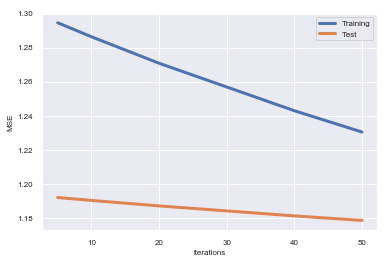

In [76]:
#plot of Iterations vs Train and Test MSE for the Best model 
plt.plot(iter_array, best_model.train_mse,label='Training', linewidth=3)
plt.plot(iter_array, best_model.test_mse,label='Test', linewidth=3)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('iterations', fontsize=8)
plt.ylabel('MSE', fontsize=8)
plt.legend(loc='upper right', fontsize=8)
plt.show()

### Recommender Systems using matrix factorization libmf /sckit-learn

In [144]:
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error 
def get_rmse(pred,actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return np.sqrt(mean_squared_error(pred,actual))


In [147]:
#Matrix Factorization with 3-Fold Cross Validation & Hyperparamater Tuning with built-in NMF package
ind = np.array(range(0, len(train)))
folds = np.array_split(ind, 3)    
mselist = []
fold_mse = []
iter_array = [10]
latent_factors = [5, 20, 40]
regularizations = [0.001, 0.000001, 0.01]
regularizations.sort()
best_params = {}
best_params['n_factors'] = latent_factors[0]
best_params['reg'] = regularizations[0]
best_params['test_mse'] = np.inf
best_params['model'] = None
for fact in latent_factors:    
    for reg in regularizations:        
        print('\nK: {}'.format(fact))
        print('Lamda: {}'.format(reg))
        for i in range(0, len(folds)):
            print('Fold: {}'.format(i))
            validationSet = folds[i]
            trainSet = np.setdiff1d(ind, validationSet)        
            train_data = np.take(train, trainSet, axis = 0)
            test_data = np.take(test, validationSet, axis = 0)
            model_NMF = NMF(n_components=fact,alpha=reg,l1_ratio=0.01,verbose=True,max_iter =10, solver = 'cd')
            w=model_NMF.fit_transform(train_data) 
            h=model_NMF.components_
            pred=np.dot(w,h)                        
            mselist.append(get_rmse(pred,test_data))  
        fold_mse.append(np.average(mselist))
        if fold_mse[-1] < best_params['test_mse']:
            best_params['n_factors'] = fact
            best_params['reg'] = reg
            best_params['test_mse'] = mselist[-1]
print('New optimal hyperparameters')
print(pd.Series(best_params))


K: 5
Lamda: 1e-06
Fold: 0
violation: 1.0
violation: 0.4940056198216629
violation: 0.35121506803641306
violation: 0.26244606105274126
violation: 0.20397261399733035
violation: 0.16445072094327232
violation: 0.1361291846708456
violation: 0.11616723075052436
violation: 0.10203163145848242
violation: 0.09115021643584816
Fold: 1
violation: 1.0
violation: 0.4569175023806255
violation: 0.32061588441206174
violation: 0.24953845942071085
violation: 0.20354514888504582
violation: 0.1756257057570779
violation: 0.15596027690806685
violation: 0.1419832027450067
violation: 0.1305737540235711
violation: 0.12055386466261528
Fold: 2
violation: 1.0
violation: 0.5335990379667765
violation: 0.3802215718148848
violation: 0.28642494342487723
violation: 0.22150434061209817
violation: 0.17428417460996795
violation: 0.14102658703356047
violation: 0.11473989914145301
violation: 0.09255394565128477
violation: 0.07551542450008228

K: 5
Lamda: 0.001
Fold: 0
violation: 1.0
violation: 0.49406071961799847
violation:

New optimal hyperparameters
model             NaN
n_factors    5.000000
rate         0.000010
reg          0.000001
test_mse     3.168898
train_mse         inf
dtype: float64


In [152]:
#plot of Iterations vs Train and Test MSE for the Best model 
iter_array = [5,10,20,40,50]
ind = np.array(range(0, len(train)))
folds = np.array_split(ind, 5)    
mselist = []
for i in range(0, len(folds)):
    validationSet = folds[i]
    trainSet = np.setdiff1d(ind, validationSet)        
    train_data = np.take(train, trainSet, axis = 0)
    test_data = np.take(test, validationSet, axis = 0)
    model_NMF = NMF(n_components=5,alpha=0.000001,l1_ratio=0.01,verbose=True,max_iter =10, solver = 'cd')
    w=model_NMF.fit_transform(train) 
    h=model_NMF.components_
    pred=np.dot(w,h)    
    mselist.append(get_rmse(pred,test_data))
np.average(mselist)

violation: 1.0
violation: 0.4605790684038458
violation: 0.3493951699495355
violation: 0.30866355215526103
violation: 0.2832453065000314
violation: 0.24421712666919476
violation: 0.1998323335854773
violation: 0.16291638646505105
violation: 0.13691359185124868
violation: 0.11884281967154918
violation: 1.0
violation: 0.4605843649489624
violation: 0.3494046583305781
violation: 0.3086738232914556
violation: 0.28324771592891623
violation: 0.24421132910136853
violation: 0.19982593671764765
violation: 0.16291201755254955
violation: 0.13691071859293952
violation: 0.11884105861290464
violation: 1.0
violation: 0.4605825002563478
violation: 0.34940553299514926
violation: 0.3086758168243264
violation: 0.28320456390941084
violation: 0.24420828501716021
violation: 0.19982334471229796
violation: 0.16291020679884793
violation: 0.13690961013642206
violation: 0.11884040535883675
violation: 1.0
violation: 0.4605800298932714
violation: 0.34940009861903115
violation: 0.3086693292434772
violation: 0.28320362

3.1860138574457038

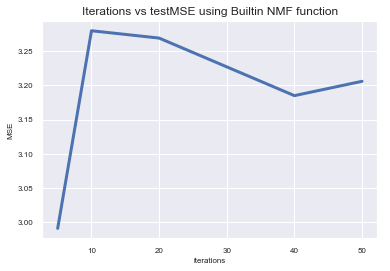

In [217]:
plt.title("Iterations vs testMSE using Builtin NMF function")
plt.plot(iter_array, mselist, linewidth=3)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('iterations', fontsize=8)
plt.ylabel('MSE', fontsize=8)
plt.show()

### Recommender Systems using matrix factorization using surprise package

In [83]:
from surprise import SVDpp
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.15)
param_grid = {'n_factors': [10, 20, 30, 40], 'n_epochs': [4, 8, 10], 'lr_all': [0.001, 0.003, 0.005],
              'reg_all': [0.08, 0.1, 0.15]}

In [84]:
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)

In [85]:
gs.fit(data)
algo = gs.best_estimator['rmse']
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

0.9498108131459398
{'reg_all': 0.08, 'lr_all': 0.005, 'n_epochs': 10, 'n_factors': 10}
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9458  0.9466  0.9578  0.9500  0.0055  
MAE (testset)     0.7479  0.7539  0.7602  0.7540  0.0050  
Fit time          2.28    2.24    2.25    2.25    0.02    
Test time         1.04    1.04    0.87    0.98    0.08    


{'fit_time': (2.2816412448883057, 2.2355852127075195, 2.245788097381592),
 'test_mae': array([0.74791952, 0.75391206, 0.76015556]),
 'test_rmse': array([0.94575379, 0.9465574 , 0.95779011]),
 'test_time': (1.0377955436706543, 1.0382351875305176, 0.8676130771636963)}

In [89]:
param_grid1 = {'n_factors': [5, 20, 40], 'n_epochs': [5,10,20,40,50], 'lr_all': [0.00001, 0.0001, 0.001],
              'reg_all': [0.001, 0.000001, 0.01]}

In [90]:
gs2 = GridSearchCV(SVD, param_grid1, measures=['rmse'], cv=3)
gs2.fit(data)
algo = gs2.best_estimator['rmse']
print(gs2.best_score['rmse'])
print(gs2.best_params['rmse'])
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

0.9481462232526462
{'reg_all': 1e-06, 'lr_all': 0.001, 'n_epochs': 50, 'n_factors': 5}
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9481  0.9517  0.9484  0.9494  0.0016  
MAE (testset)     0.7517  0.7511  0.7501  0.7510  0.0007  
Fit time          9.30    9.61    7.82    8.91    0.78    
Test time         0.83    1.05    0.47    0.78    0.24    


{'fit_time': (9.301164865493774, 9.612375736236572, 7.820183277130127),
 'test_mae': array([0.75174253, 0.75113108, 0.75009476]),
 'test_rmse': array([0.94808945, 0.95166757, 0.94836374]),
 'test_time': (0.8265485763549805, 1.0536987781524658, 0.47431373596191406)}

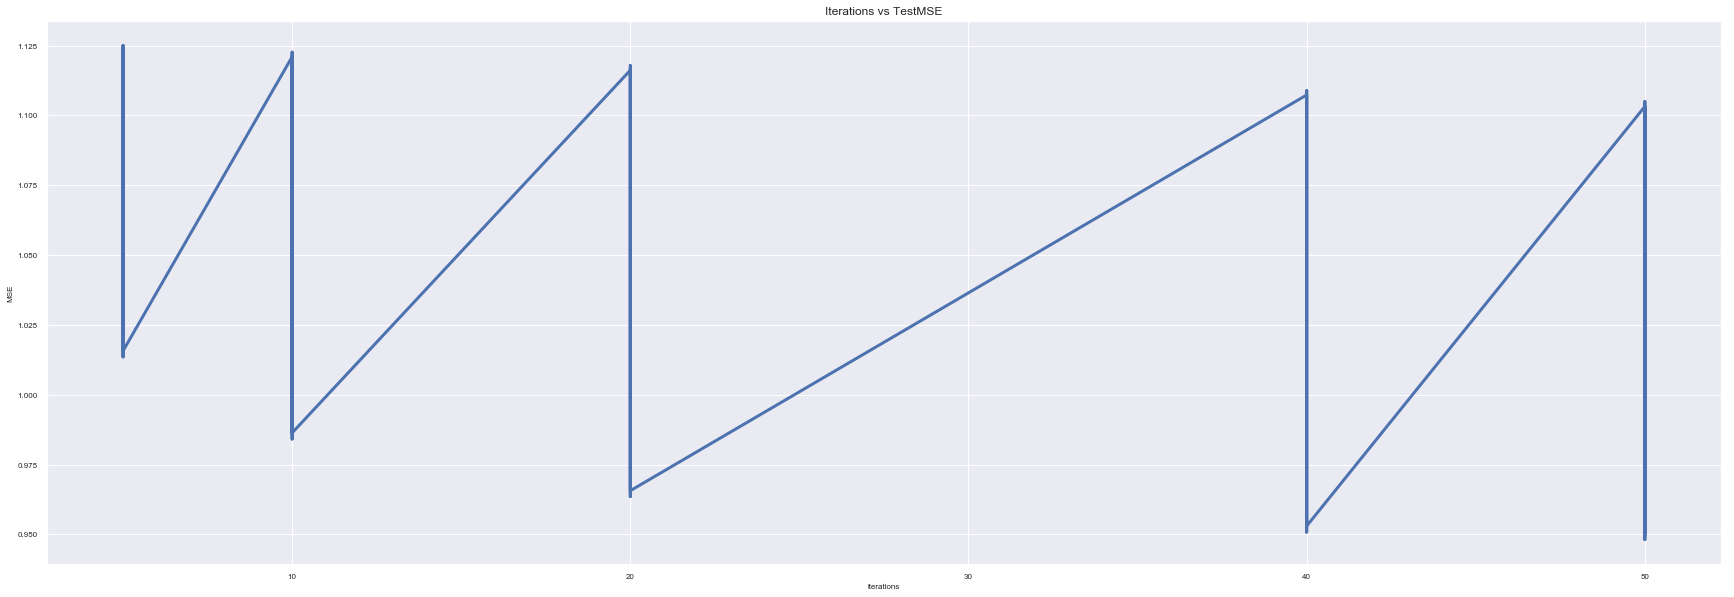

In [112]:
plt.figure(figsize = (30, 10))
plt.plot(gs2.cv_results['param_n_epochs'],gs2.cv_results['mean_test_rmse'], linewidth=3)
#plt.plot(gs2.best_params['rmse'],label='Test', linewidth=3)
plt.title('Iterations vs TestMSE')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('iterations', fontsize=8)
plt.ylabel('MSE', fontsize=8)
plt.show()